## **Music Taste EDA**

'What kind of music do you listen to?'

**Exectutive Summary** \
The main goal of this project is to explore the top 5 playlists that I listen to in order to better understand my music taste, while also providing visualizations of the dataset.

**Business Problem** \
While this project only looks at my Spotify data, this is a demonstration of Exploratory Data Analysis. EDA is a crucial step in the field of Data Science and Machine Learning that attempts to understand and 'fix' the data. The main purpose of EDA is to identify possible errors, as well as better understanding the data's patterns and the variable's relationships. Through methods used in this project, I can help further understand and visualize any given dataset in the future.

**Business Impact** \
Understanding a data set can be very important in any given circumstance. For example, if this data set was looking at customer preference data rather than just my music data, implementing these methods can allow for a better understanding of the customers, allowing for more effective marketing strategies or improved customer satisfaction.

**Methodology**
1. Read in the data using a Pandas Dataframe.
2. Clean and preprocess data through Pandas methods and other packages.
3. Create visualizations to gain understanding of my preferences through Matplotlib and Seaborn.

Now, back to the question. What kind of music do I listen to?


This is a very common question that I don't really have a good answer to. Afterall, as a Japanese-American my music taste includes both Japanese and English songs, so it's pretty hard to try to boil it down into a simple genre.
But this made me curious on what exactly my music taste was. So, I decided to create this EDA of my music playlists.



This project explores my top 5 playlists based on csv files that Spotify provides.

In [1]:
pip install pykakasi

In [2]:
from matplotlib import pyplot as plt
import seaborn
import pandas as pd
from collections import defaultdict
from datetime import date
import pykakasi

### Read in the Data

Using the CSV file data that Spotify provides, read in the data (in this case my top 5 playlists) into pandas dataframes.

In [3]:
# read the data
for i in range(1,6):
  df = pd.concat(
    map(pd.read_csv, ['Playlist_A.csv','Playlist_B.csv','Playlist_C.csv','Playlist_D.csv','Playlist_E.csv']), ignore_index=True)
df.dropna()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Spotify ID        463 non-null    object 
 1   Artist IDs        463 non-null    object 
 2   Track Name        463 non-null    object 
 3   Album Name        463 non-null    object 
 4   Artist Name(s)    463 non-null    object 
 5   Release Date      463 non-null    object 
 6   Duration (ms)     463 non-null    int64  
 7   Popularity        463 non-null    int64  
 8   Added By          463 non-null    object 
 9   Added At          463 non-null    object 
 10  Genres            430 non-null    object 
 11  Danceability      463 non-null    float64
 12  Energy            463 non-null    float64
 13  Key               463 non-null    int64  
 14  Loudness          463 non-null    float64
 15  Mode              463 non-null    int64  
 16  Speechiness       463 non-null    float64
 1

We can see from this output that these csv files have a variety of information about each song, meaning there is a lot of potential patterns and relationships to explore.

Now, considering that this is a compilation of my top 5 playlists, there is a good chance that I have overlapping songs. We can check this by taking a look at my favorite artist, Kenshi Yonezu.

In [4]:
print(df[df['Artist Name(s)']=="Kenshi Yonezu"]['Track Name'])

0        月を見ていた - Moongazing
5       地球儀 - Spinning Globe
24                メランコリーキッチン
52                 KICK BACK
53                      LADY
               ...          
427                     心像放映
428                       抄本
429     地球儀 - Spinning Globe
430      月を見ていた - Moongazing
431    さよーならまたいつか！- Sayonara
Name: Track Name, Length: 67, dtype: object


We can see from the output that there is indeed an overlap in the songs, so we can utilize the drop_duplicates function to clean this problem up.

In [5]:
df.drop_duplicates(subset=['Track Name'],inplace = True, ignore_index=True)
print(df[df['Artist Name(s)']=="Kenshi Yonezu"]['Track Name'])

0                 月を見ていた - Moongazing
5                地球儀 - Spinning Globe
24                         メランコリーキッチン
51                          KICK BACK
52                               LADY
79                             カムパネルラ
102                              迷える羊
110             さよーならまたいつか！- Sayonara
140                             Lemon
355                          Flamingo
356                                感電
358                              パプリカ
359                               馬と鹿
360                              優しい人
361                              ひまわり
362                         Décolleté
363                      TEENAGE RIOT
364                              海の幽霊
365                              カナリヤ
366                                飛燕
367                             LOSER
368               ピースサイン - Peace Sign
370                             orion
371                         かいじゅうのマーチ
372                         Moonlight
373                                春雷
375         

We can see from this new output that the duplicates have not been dropped, allowing for the rest of the data analysis to go more smoothly.

### Translating Song Titles

As you can probably tell from the list of song titles above, a lot of the songs I listen to have Japanese titles. To make this EDA easier to see, I can translate the titles and artist names that are in Japanese to Romaji English.

In [6]:
print(df.at[6,'Artist Name(s)'])

ロクデナシ


In [7]:
kks = pykakasi.kakasi()
translate = lambda s: ''.join([index['hepburn'].strip() for index in kks.convert(s)])
df['Track Name'] = df['Track Name'].apply(translate)
df['Artist Name(s)'] = df['Artist Name(s)'].apply(translate)

In [8]:
print(df.at[6,'Artist Name(s)'])

rokudenashi


We can see that the translation did indeed work, so now we are done with the data cleaning step, and we can move on to the analysis to really understand it.

### Songs per Artist

Looking at the features that we have, the most intuitive visualization we can make is to understand how many songs of each artist we have. This will show us which artists I listen to the most, and if it is very skewed or even across many artists.

Number of different arists:  279


Text(0.5, 1.0, 'Number of Songs by Artists - Top 25')

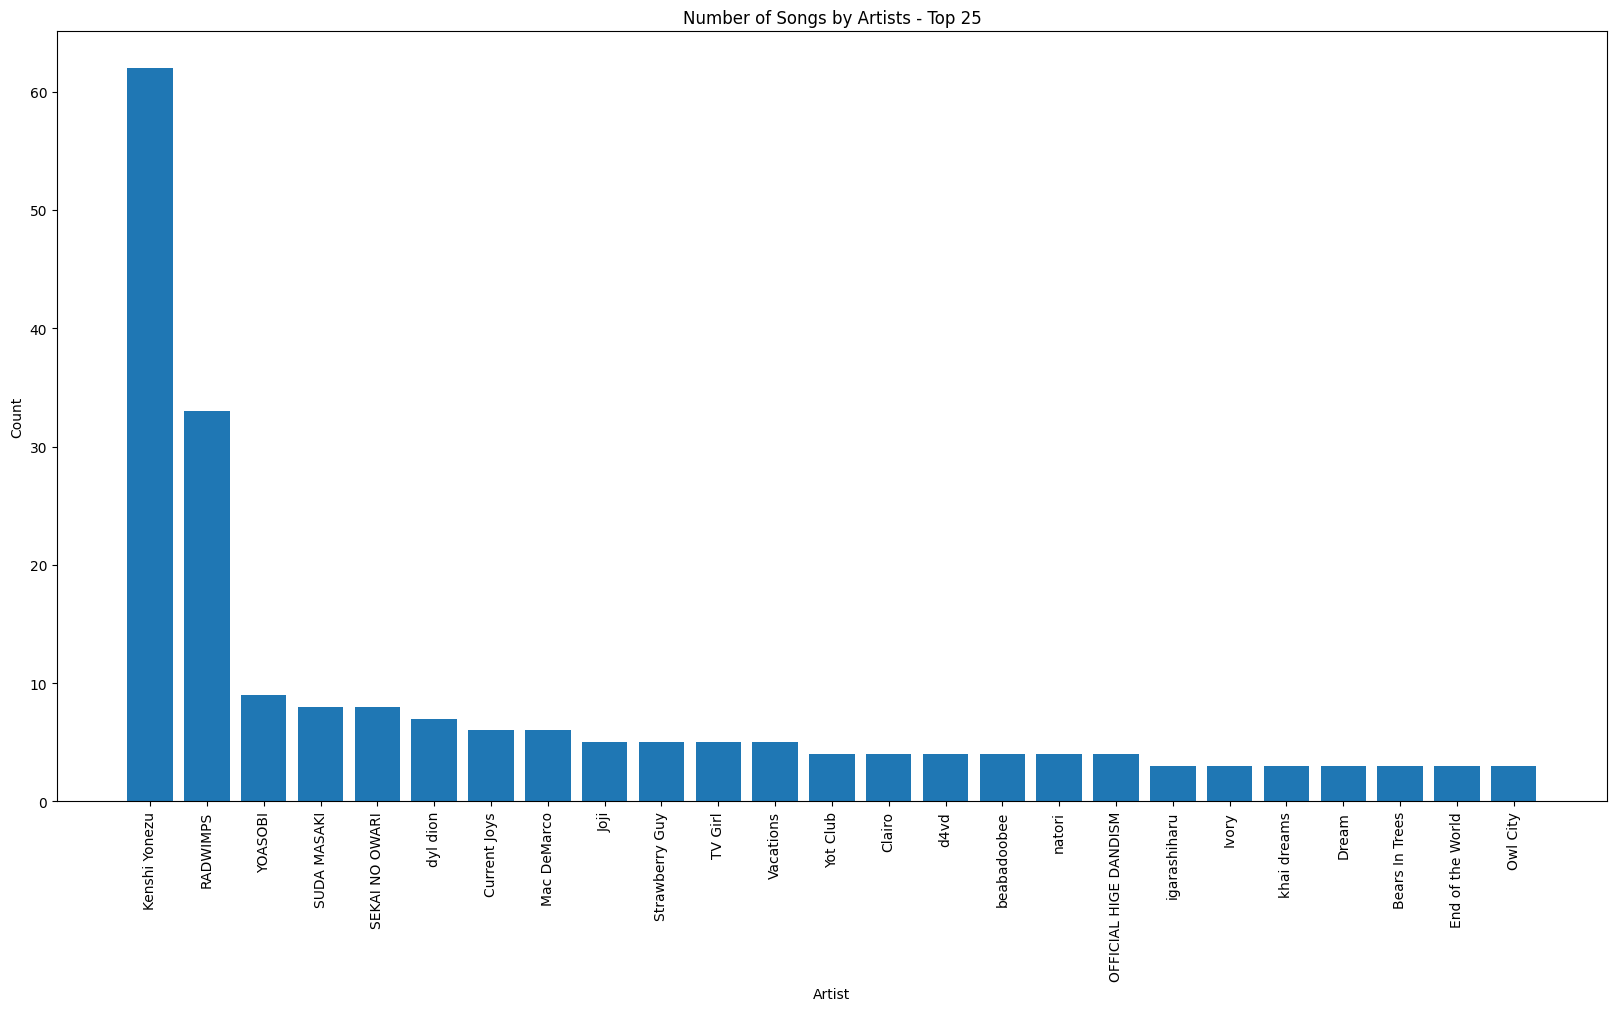

In [9]:
artists = {}
for i,song in df.iterrows():
  for musician in song['Artist Name(s)'].split(','):
    if musician in artists:
      artists[musician] += 1
    else:
      artists[musician] = 1

artists = pd.DataFrame(artists.items(),columns=['Artist','Count']).sort_values('Count',ascending=False).reset_index(drop=True)
print("Number of different arists: ",artists.shape[0])

plt.figure(figsize=(20,10))
plt.bar(artists['Artist'][:25],artists['Count'][:25])
plt.xticks(rotation=90)
plt.xlabel(artists.columns[0])
plt.ylabel(artists.columns[1])
plt.title('Number of Songs by Artists - Top 25')

From this graph it looks like the artists I listen to is pretty skewed, with Kenshi Yonezu and RADWIMPS dominating with 95 songs together, around 20% of the list. Additionally, I have 279 unique artists, which means that I have a lot of artists where I only have one or two songs of.

### Visualizing Based on Date - Release Date and Add Date

We can make another interesting graph based on release date of the songs, possibly giving insight on what time period of songs I listen to the most.

However, before we can make the graph, we must account for songs that might have a release year but not a date. So, I will resolve this issue by finding the songs that don't have an exact date and setting them to 1/1 of that year.

In [10]:
for index,date in enumerate(df['Release Date']):
  release_month = date[5:7]
  if release_month.isdigit() == False:
    print(index, date)
    df.at[index,'Release Date'] = date[0:4]+'-'+'01'+'-'+'01'

180 1977
287 2016
299 2018
303 2016
307 2016
309 2016


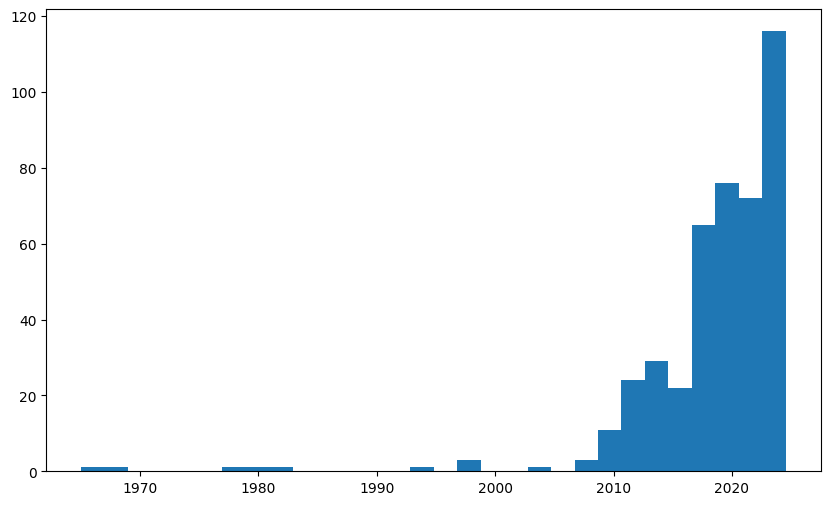

Earliest Release Date: 1965-01-11 L-O-V-E by Nat King Cole
Latest Release Date: 2024-07-25 hope it lasts by dyl dion


In [11]:
from datetime import date
parse_date = lambda d:((int(d[:4]), int(d[5:7]), int(d[8:10])))
plt.figure(figsize=(10, 6))
plt.hist([date(*parse_date(d)) for d in df['Release Date']], bins=30)
plt.show()

earliest = df.loc[df['Release Date'].argmin()]
latest = df.loc[df['Release Date'].argmax()]
print("Earliest Release Date:", earliest['Release Date'],earliest['Track Name'],'by',earliest['Artist Name(s)'])
print("Latest Release Date:", latest['Release Date'],latest['Track Name'],'by',latest['Artist Name(s)'])

We can see from the graph that most of the songs that I listen to are from more recent years, with a singificant increase starting from 2010. This makes a lot of sense considering that I was born in 2003. It can be noted though that I have many friends who tend to like older music from before they were born, but very obviously this is not the case for me.

In a similar way, we can also graph when I added the song into the playlist.

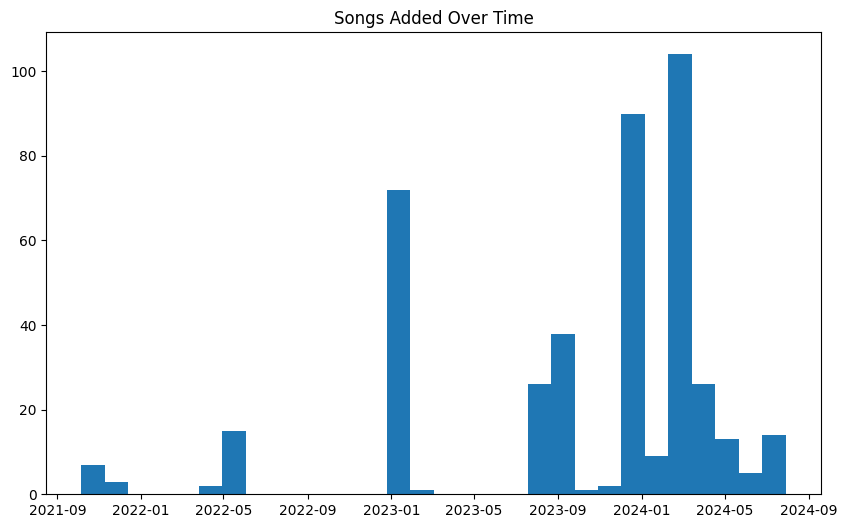

Earliest Added: 2021-10-06 SLOW DANCING IN THE DARK by Joji
Latest Added: 2024-07-29 nijiironosensou by SEKAI NO OWARI


In [12]:
parse_date = lambda d:(int(d[:4]), int(d[5:7]), int(d[8:10]))
plt.figure(figsize=(10, 6))
plt.hist([date(*parse_date(d)) for d in df['Added At']], bins=30)
plt.title('Songs Added Over Time')
plt.show()

earliest = df.loc[df['Added At'].argmin()]
latest = df.loc[df['Added At'].argmax()]
print("Earliest Added:", earliest['Added At'][0:10],earliest['Track Name'],'by',earliest['Artist Name(s)'])
print("Latest Added:", latest['Added At'][0:10],latest['Track Name'],'by',latest['Artist Name(s)'])

This graph is interesting to watch as you can really see the reflection of my interactions with music-listening based on the activity. 2021 was when I first created my Spotify account. Then, in December of 2022, I visited Japan, where I found a lot of new music that was trending there, leading me to create a playlist in January of 2023. Then I joined Spotify Premium in the summer of 2023, and we can see that I have been active in adding songs into my playlists since then.

Now looking at these two graphs we can see that the timespan we are looking at for the two graphs are relatively different, with the first graph convering a lot more time. However, I tend to listen to newer songs, so I wanted to try graphing out doing the math on the time between release date and add date.

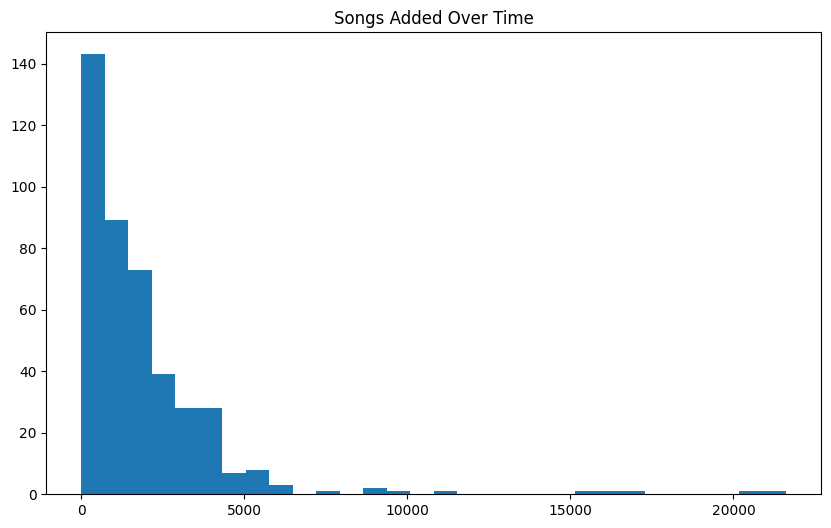

AVERAGE: 1879.3504672897195
SONGS RELEASED SINCE 2021-10-06: 156
Average add time for recent songs: 337.30128205128204
Songs added within a month since release: 19
Percentage of recent songs added within a month of release: 12.179487179487179 %


In [13]:
for i, song in df.iterrows():
  df.at[i,'Release Date'] = date(*parse_date(song['Release Date']))
  df.at[i,'Added At'] = date(*parse_date(song['Added At']))
  df.at[i,'Time Between Release and Add'] = (df.at[i,'Added At'] - df.at[i,'Release Date']).days

plt.figure(figsize=(10, 6))
plt.hist(df['Time Between Release and Add'], bins=30)
plt.title('Songs Added Over Time')
plt.show()

print("AVERAGE:",df['Time Between Release and Add'].mean())
print("SONGS RELEASED SINCE 2021-10-06:",df[df['Release Date'] >= date(2021,10,6)].shape[0])
print("Average add time for recent songs:",df[df['Release Date'] >= date(2021,10,6)]['Time Between Release and Add'].mean())
print("Songs added within a month since release:",df[df['Time Between Release and Add']<= 30].shape[0])
print("Percentage of recent songs added within a month of release:",df[df['Time Between Release and Add']<= 30].shape[0]/df[df['Release Date'] >= date(2021,10,6)].shape[0]*100,'%')

In order to get a sense of the numbers, I decided to print out a variety of calculuations, as can be seen from the print statements above. First I got the average, but I realized that this was getting skewed by songs from too long ago. So, I decided that I would cut down on the songs that I am looking at to 'Recent' songs. I chose to work with 10/06/2021 because as calculuated from earlier, the first song I added was on this day. Therefore we would now be looking at just the songs that have been added since I started adding songs to my playlists. When we calculuate the average time, we can see that it has signficantly decreased, though it is still more days that I expected.

### Genre Preferences

Now let's approach the question that we are here for. What is my music taste?

Most people explain their music taste based on the genre of songs that they listen to, so I decided to try visualizing this as well.

As a side note, some songs had NaN for genre, and empty strings also appreared as valid genres, so steps have been added in the deal with these exceptions.

Genre Count: 218


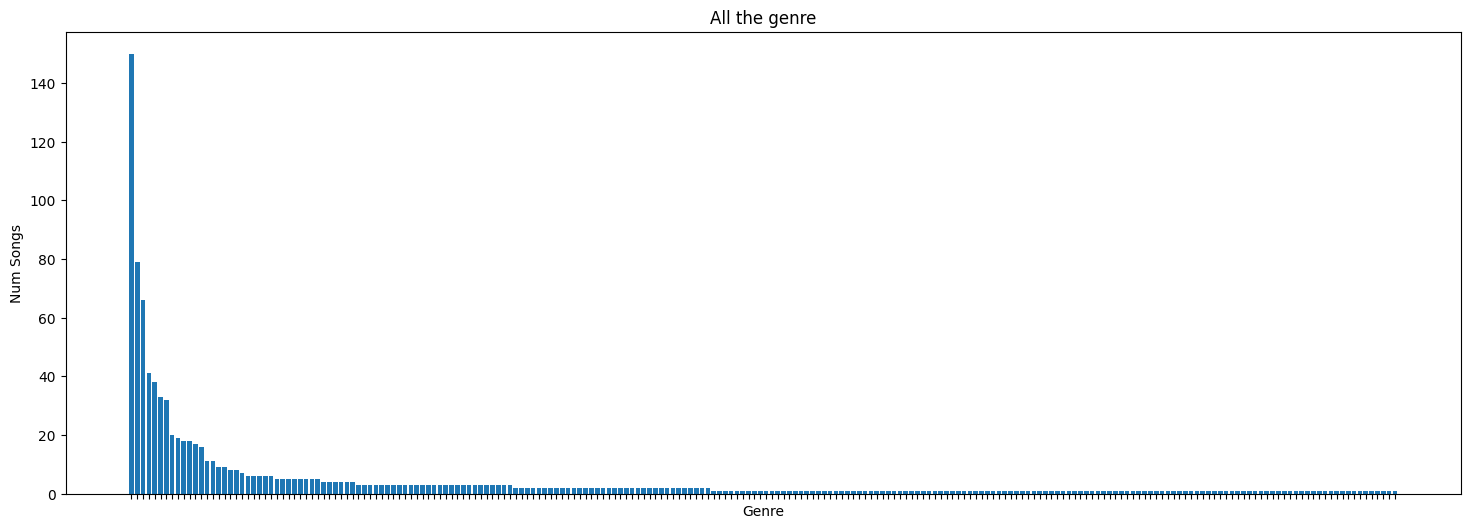

In [14]:
genres = defaultdict(int)
for i,song in df.iterrows():
    if type(song['Genres']) is str: # deals with NaN
        for genre in song['Genres'].split(','):
            if len(genre) > 0: # deals with empty strings
                genres[genre] += 1

genres = pd.DataFrame(genres.items(), columns=['Genre', 'Num Songs']).sort_values('Num Songs', ascending=False).reset_index(drop=True)
print("Genre Count:", genres.shape[0])

plt.figure(figsize=(18, 6))
plt.bar(genres['Genre'], genres['Num Songs'])
plt.xticks(visible=False)
plt.xlabel(genres.columns[0])
plt.ylabel(genres.columns[1])
plt.title('All the genre');

This graph is very difficult to actually read, but we can see that the only values that really matter are at the start, so below is just the Top 50 genres.

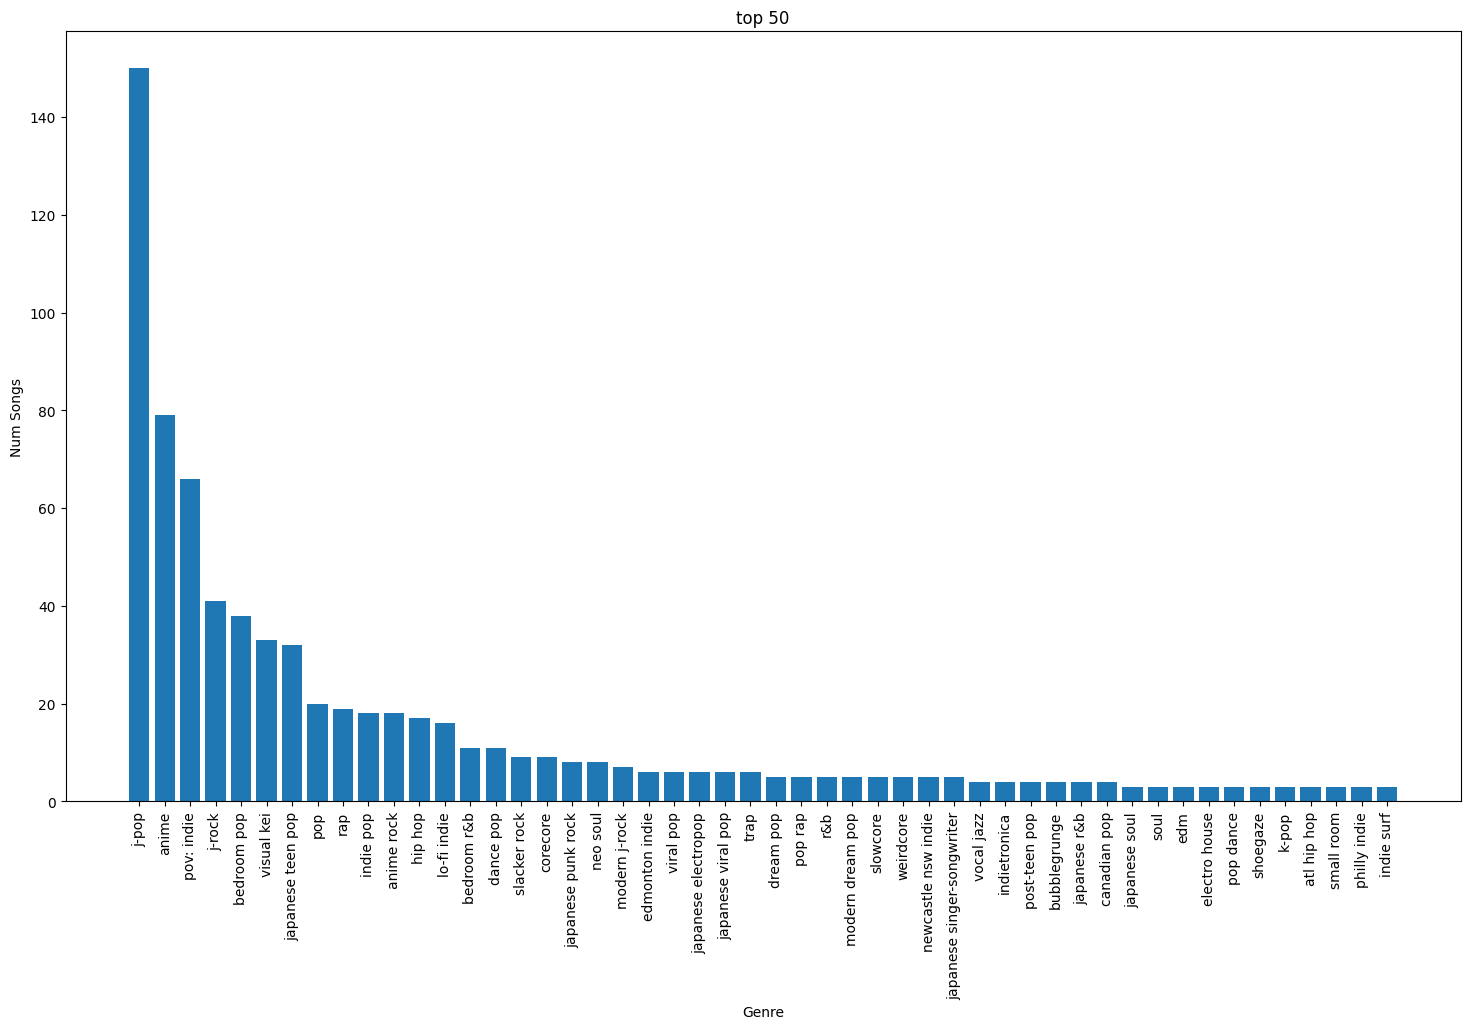

In [15]:
plt.figure(figsize=(18, 10))
plt.bar(genres['Genre'][:50], genres['Num Songs'][:50])
plt.xticks(rotation=90)
plt.xlabel(genres.columns[0])
plt.ylabel(genres.columns[1])
plt.title('top 50');

Now we can see the actual genre names, and we see that the songs I listen to the most are 'j-pop', 'anime', 'pov:indie', 'j-rock', and 'bedroom pop'. I'm not exactly sure what 'pov:indie' and 'bedroom pop' are supposed to mean, but I think j-pop and j-rock are pretty good descriptions.

The graph definitely has some obscure genre names, so I decided to just see what the bottom 50 would give me just for the fun of it.

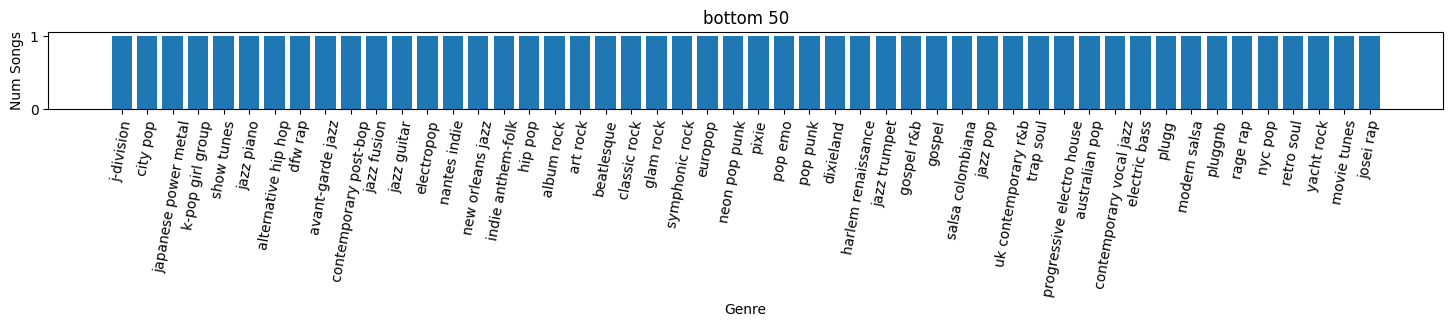

In [16]:
plt.figure(figsize=(18, 1))
plt.bar(genres['Genre'][-50:], genres['Num Songs'][-50:])
plt.xticks(rotation=80)
plt.xlabel(genres.columns[0])
plt.ylabel(genres.columns[1])
plt.title('bottom 50');

Surprisingly not too many weird names.

### Visualizing Other Distributions

Looking at the different attributes we are given from Spotify, one of the ones that I was curious about was the Popularity index.

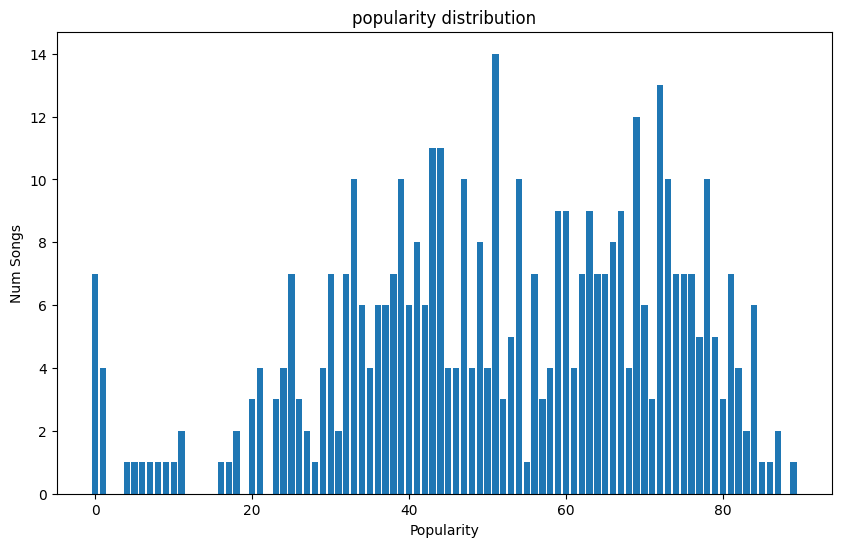

Average song popularity:  47.123456790123456
Median song popularity:  48.0
Max song popularity:  89


In [17]:
popularity = defaultdict(int)
for i,song in df.iterrows():
    popularity[song['Popularity']] += 1

popularity = pd.DataFrame(popularity.items(), columns=['Popularity', 'Num Songs']).sort_values('Popularity')

plt.figure(figsize=(10, 6))
plt.bar(popularity['Popularity'].values, popularity['Num Songs'].values)
plt.xlabel(popularity.columns[0])
plt.ylabel(popularity.columns[1])
plt.title('popularity distribution');
plt.show()

print("Average song popularity: ", popularity['Popularity'].mean())
print("Median song popularity: ", popularity['Popularity'].median())
print("Max song popularity: ", popularity['Popularity'].max())

It looks like my song choices are not too bad based on this popularity index. My average song popularity and media song popularity are both very close to 50, meaning that I have a good variety in terms of the popularity of the songs I listen to.

Another feature I wanted to take a look at is song duration. This should be also pretty interesting as I think I tend to like songs on the longer side.

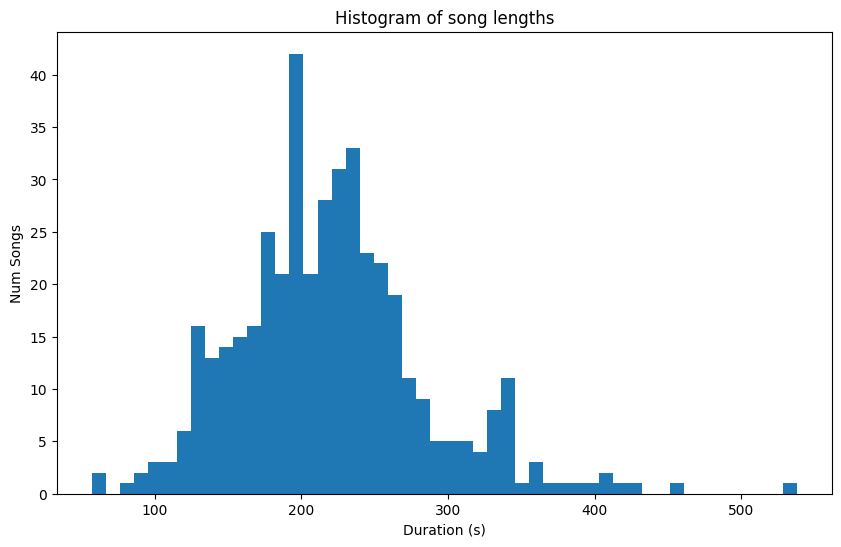

Average song length: 3:40.124231308411225
Median song length: 3:35.24799999999999
Shortest piece: 0:57.37 From the Subway Train by Vansire
Shortest piece: 0:57.37 Sparkle - movie ver. by RADWIMPS


In [18]:
plt.figure(figsize=(10,6))
plt.hist(df['Duration (ms)']/1000, bins=50);
plt.xlabel('Duration (s)')
plt.ylabel('Num Songs')
plt.title('Histogram of song lengths')
plt.show()

mean = df['Duration (ms)'].mean()/1000
median = df['Duration (ms)'].median()/1000
print("Average song length: " + str(int(mean//60)) + (":" if mean%60 >=10 else ":0")+ str(mean%60))
print("Median song length: " + str(int(median//60)) + (":" if median%60 >=10 else ":0")+ str(median%60))

shortest_id = df.loc[df['Duration (ms)'].argmin()]
shortest_time = shortest_id['Duration (ms)']/1000
longest_id = df.loc[df['Duration (ms)'].argmax()]
longest_time = shortest_id['Duration (ms)']/1000
print("Shortest piece: "+str(int(shortest_time//60))+(":" if shortest_time%60 >=10 else ":0")+str(shortest_time%60),shortest_id['Track Name'],'by',shortest_id['Artist Name(s)'])
print("Shortest piece: "+str(int(longest_time//60))+(":" if longest_time%60 >=10 else ":0")+str(longest_time%60),longest_id['Track Name'],'by',longest_id['Artist Name(s)'])

Based on Spotify's website, the average song is 3:17. Compared to that, it looks like my prediction was correct, as both my average song length and median song length are longer than 3:17.
Looking at the shortest and longest pieces, I learned for the first time that I had a song in my playlists that was shorter than a minute long. I am not surprised at my longest song, as it is the movie version of the song, meaning there are long sections of instrumentals for the movie dialogue.

We can take a look at how all the other different features we have will pan out when we visualize them in the following way.

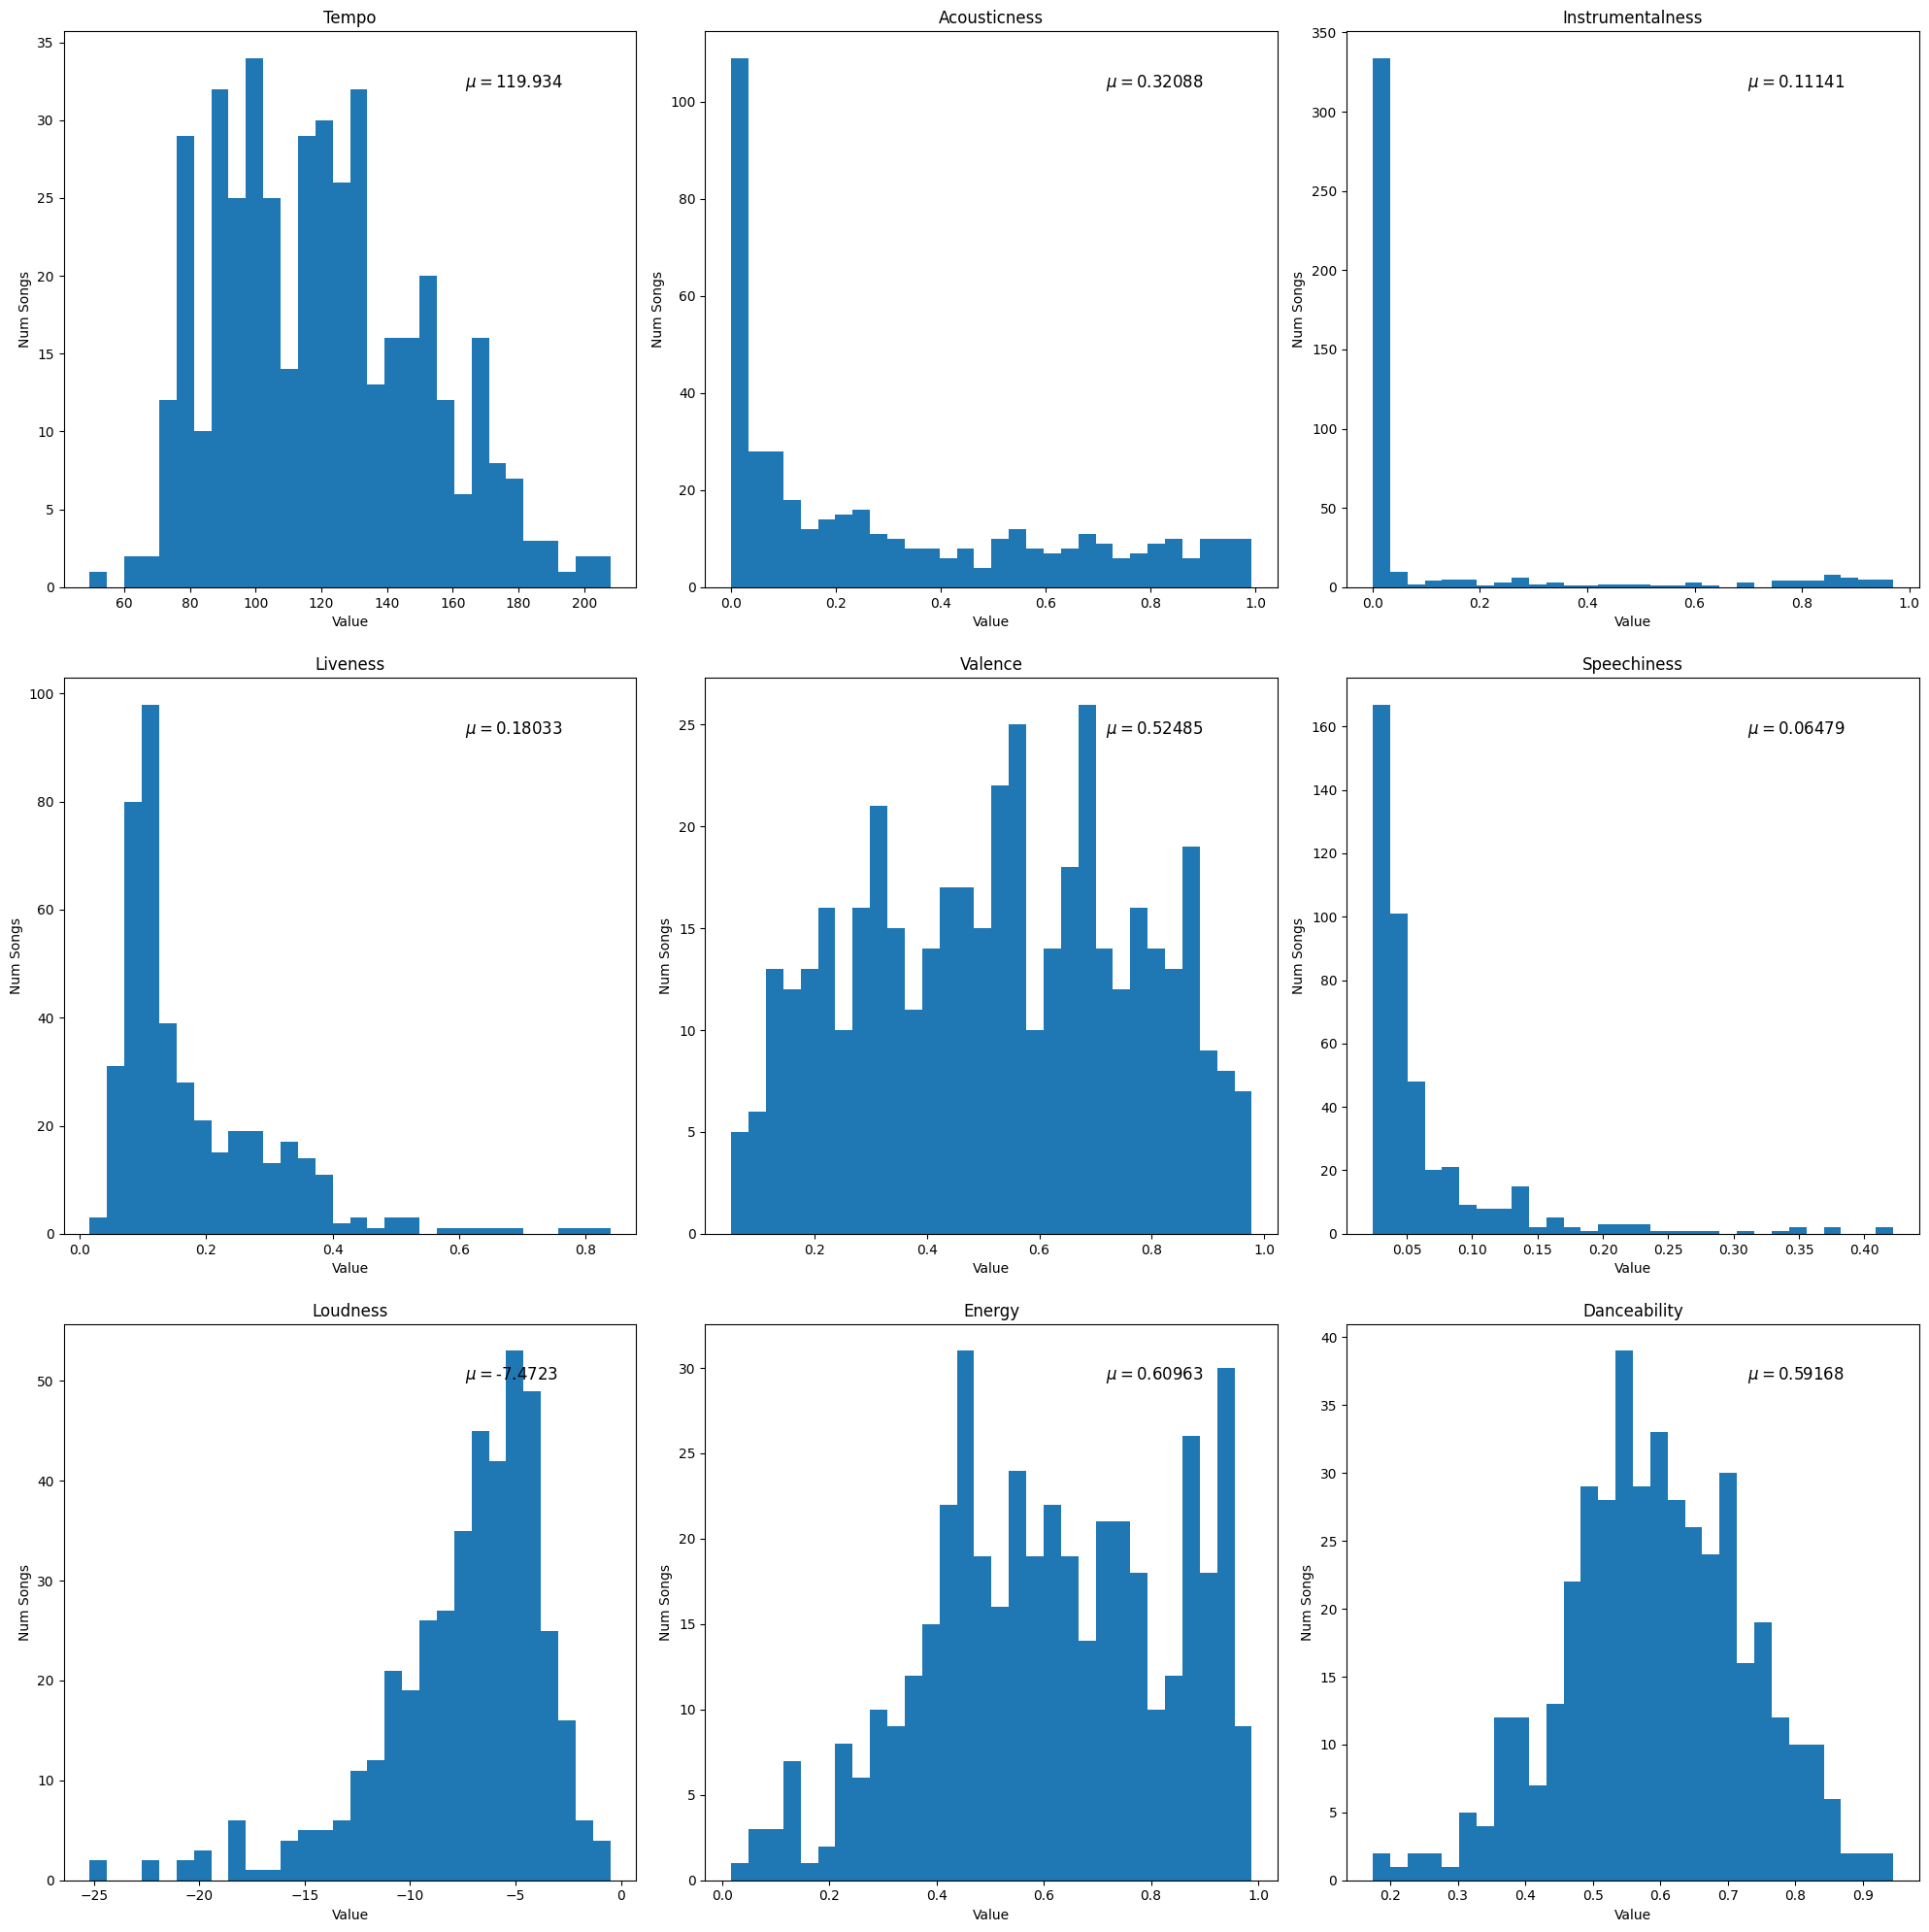

In [19]:
plt.figure(figsize=(20,20))

for i,category in enumerate(['Tempo', 'Acousticness', 'Instrumentalness', 'Liveness',
                            'Valence', 'Speechiness', 'Loudness', 'Energy', 'Danceability']):
    plt.subplot(3, 3, i+1)
    plt.hist(df[category], bins=30)
    plt.text(plt.xlim()[1] - (plt.xlim()[1] - plt.xlim()[0])*0.3, plt.ylim()[1]*0.9, r'$\mu=$'+str(df[category].mean())[:7], fontsize=12)
    plt.xlabel('Value')
    plt.ylabel('Num Songs')
    plt.title(category)

plt.tight_layout(h_pad=2)

Looking at the different graphs above, I think the most interesting thing to take a look at is the Tempo graph. This graph looks very spread out, meaning that my taste in music goes from really slow songs at less than 60bpm to really fast ones at 200+bpm.

### Time Signatures and Key

We also have information in the csv files concerning more categorical data, involving time signatures and key. We can try visualizing these parts in the following way.

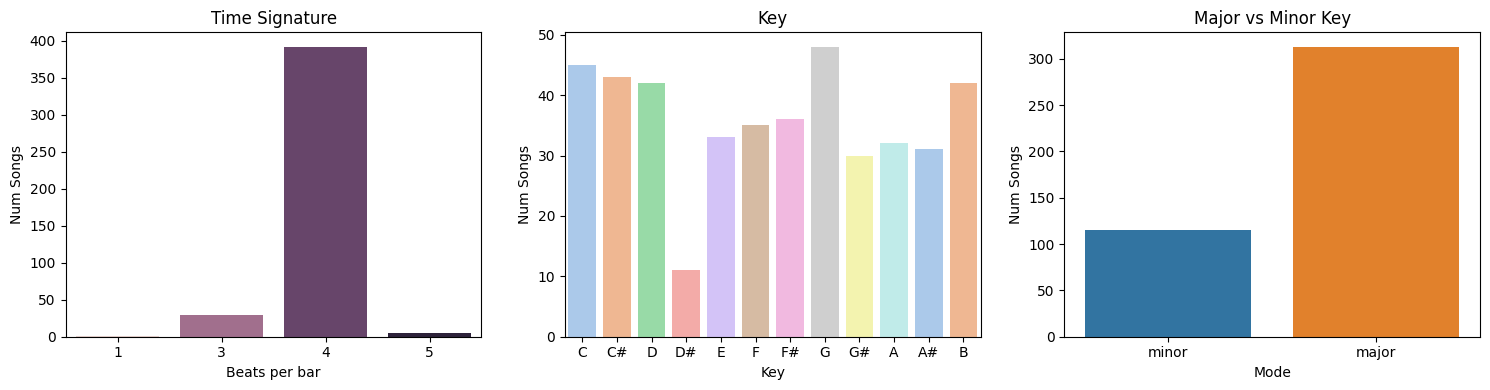

In [20]:
plt.figure(figsize=(15,4))

plt.subplot(1, 3, 1)
seaborn.countplot(df, x='Time Signature', hue='Time Signature', legend=False)
plt.xlabel('Beats per bar')
plt.ylabel('Num Songs')
plt.title('Time Signature')

plt.subplot(1, 3, 2)
seaborn.countplot(df, x='Key', hue='Key', palette='pastel', legend=False)
plt.xticks(ticks=plt.xticks()[0], labels=['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B'])
plt.ylabel('Num Songs')
plt.title('Key')

plt.subplot(1, 3, 3)
seaborn.countplot(df, x='Mode', hue='Mode', legend=False)
plt.xticks(ticks=plt.xticks()[0], labels=['minor', 'major'])
plt.ylabel('Num Songs')
plt.title('Major vs Minor Key');

plt.tight_layout(w_pad=2)

Looking at our results, we can see that there seems to be one or two songs that happen to have 1 beats per bar. Let's take a look at what those songs are specifically.

In [21]:
print(df.loc[df['Time Signature']==1][
    ['Track Name', 'Artist Name(s)', 'Release Date']][:20])

                      Track Name Artist Name(s) Release Date
282  worldstar money (interlude)           Joji   2018-02-14


Other things we can note is that I tend to like Major key songs more than Minor key songs, though I am curious on how Spotify categorizes songs that alternate throughout the piece.

### Joint Visualization

The last thing I want to experiment with is joint visualization, where we can see if there are any features that have some sort of relationship with each other.

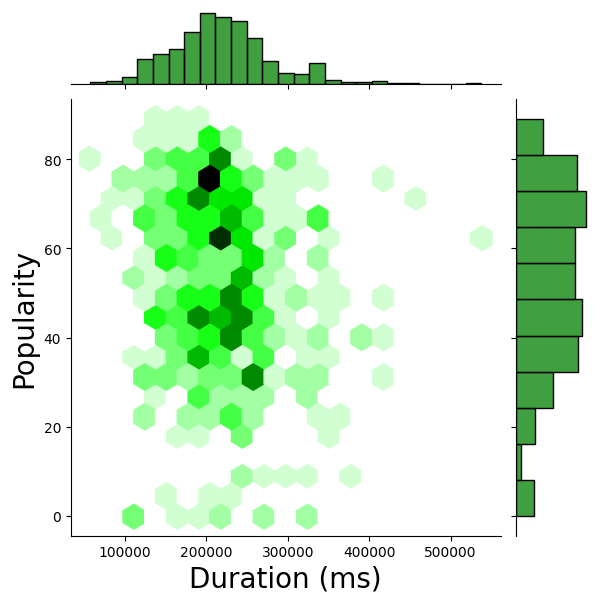

In [22]:
x = 'Duration (ms)'
y = 'Popularity'

axes = seaborn.jointplot(x=df[x], y=df[y], kind='hex', color='g')
axes.set_axis_labels(x, y, fontsize=20);

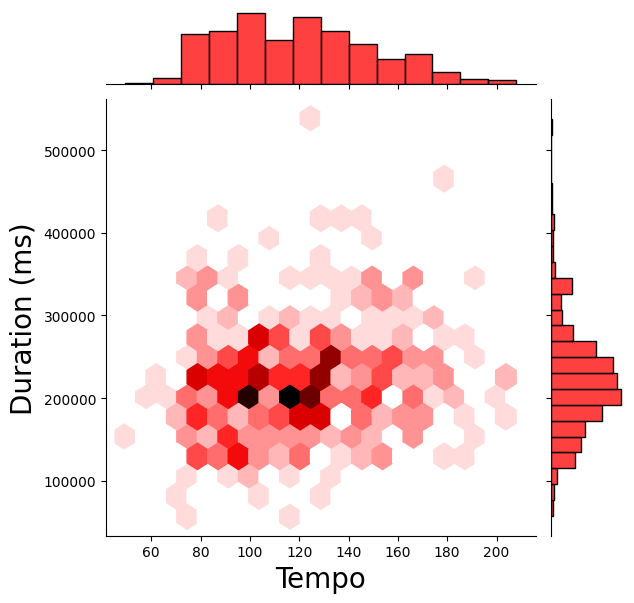

In [23]:
x = 'Tempo'
y = 'Duration (ms)'

axes = seaborn.jointplot(x=df[x], y=df[y], kind='hex', color='r')
axes.set_axis_labels(x, y, fontsize=20);

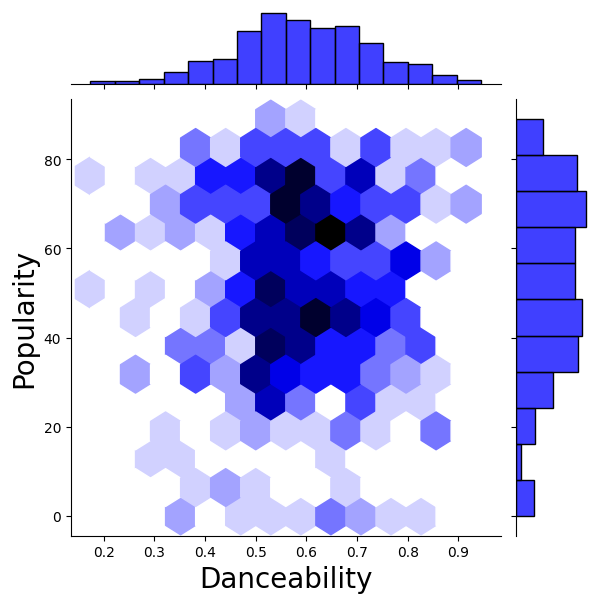

In [24]:
x = 'Danceability'
y = 'Popularity'

axes = seaborn.jointplot(x=df[x], y=df[y], kind='hex', color='b')
axes.set_axis_labels(x, y, fontsize=20);

While these graphs are very interesting to look at, I feel like there is no obvious relationship that we can really make out here. Yet this is one of the aspects of EDA, where we aim to explore as much of the data as we can and attempt to find underlying storylines.




With this, I will conclude my analysis of my music taste, as I feel like I have thoroughly gone through the data and created many visualizations demonstrating the potential powers of EDA.\
 Hope you enjoyed!